<a href="https://colab.research.google.com/github/Islom9899/Cirrhosis-Survival-Prediction/blob/main/Cirrhosis_Patient_Survival_Prediction_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [419]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score,log_loss, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [420]:
# 데이터 불러오기
URL='/content/train.csv'
URL_2 = '/content/test.csv'
train_df = pd.read_csv(URL)
test_df = pd.read_csv(URL_2)
train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D


In [421]:
test_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,22646.0,NaN,22646.0,F,NaN,NaN,NaN,N,1.4,NaN,3.34,NaN,NaN,NaN,NaN,190.0,11.0,4.0
1,15001,2149.0,NaN,18993.0,F,NaN,NaN,NaN,N,0.9,NaN,3.24,NaN,NaN,NaN,NaN,233.0,9.0,2.0
2,15002,3850.0,D-penicillamine,16050.0,M,N,N,N,N,1.0,460.0,3.64,75.0,2148.0,102.3,118.0,172.0,10.6,3.0
3,15003,2419.0,D-penicillamine,20354.0,F,N,N,N,N,0.6,258.0,3.96,31.0,642.0,70.0,83.0,336.0,10.8,2.0
4,15004,1086.0,NaN,23376.0,F,NaN,NaN,NaN,N,4.4,NaN,4.40,NaN,NaN,NaN,NaN,447.0,10.3,2.0


In [422]:
# 데이터 크기 확인
print(f'train_df :{train_df.shape}')
print(f'test_df :{test_df.shape}')

train_df :(15000, 20)
test_df :(10000, 19)


## Drug 컬럼 값 확인

In [423]:
train_df['Drug'].unique()

array(['D-penicillamine', 'Placebo', nan], dtype=object)

In [424]:
test_df['Drug'].unique()

array([nan, 'D-penicillamine', 'Placebo'], dtype=object)

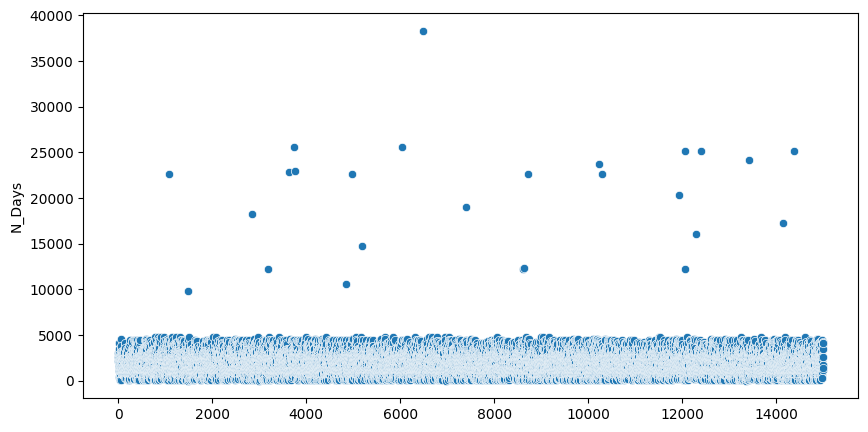

In [425]:
# N_Days 시각화 (8000 이상 제거)
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['N_Days'])
plt.show()

In [426]:
train_df=train_df[train_df['N_Days']<8000]

<ipython-input-427-1256461867>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age']=train_df['Age']//365.25


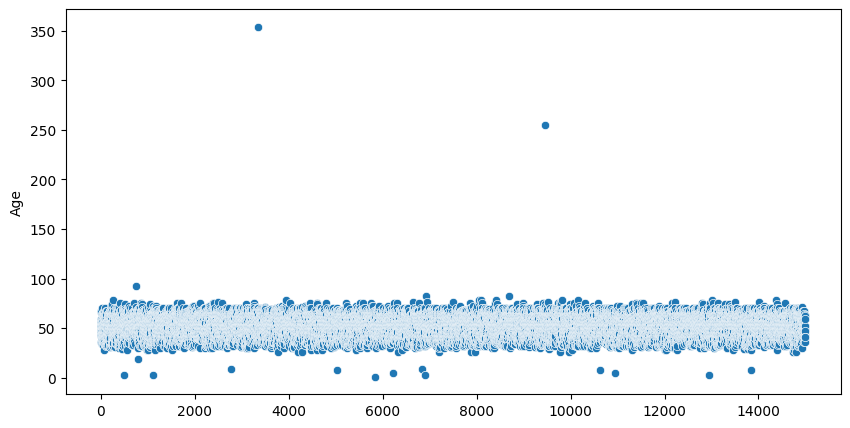

In [427]:
train_df['Age']=train_df['Age']//365.25
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Age'])
plt.show()
# 나이를 일 → 년으로 변환 후 시각화 (20세 미만, 100세 초과 제거)

In [428]:
train_df = train_df[(train_df['Age']<100) & (train_df['Age']>20)]

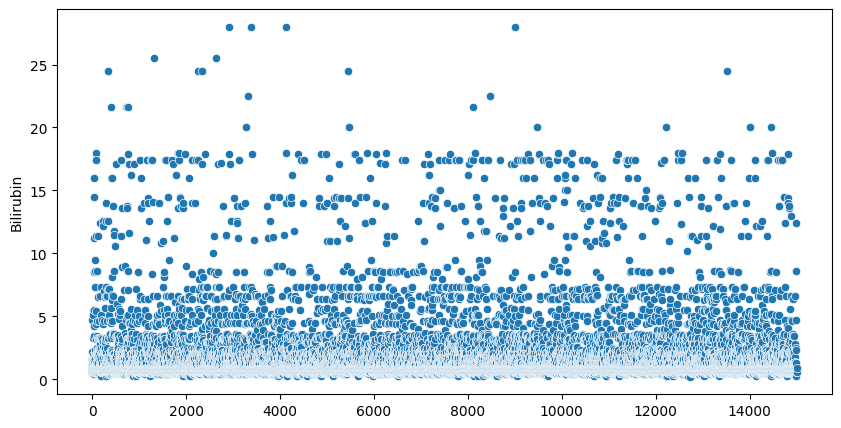

In [429]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Bilirubin'])
plt.show()
# 주요 수치형 변수 시각화 및 이상치 제거

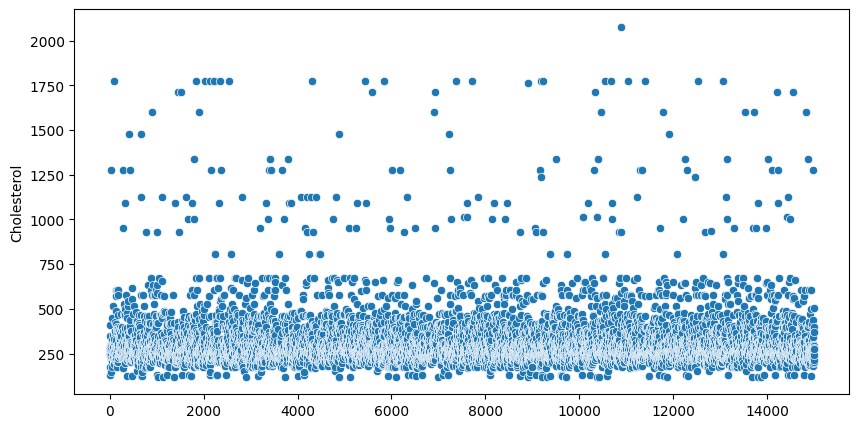

In [430]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Cholesterol'])
plt.show()


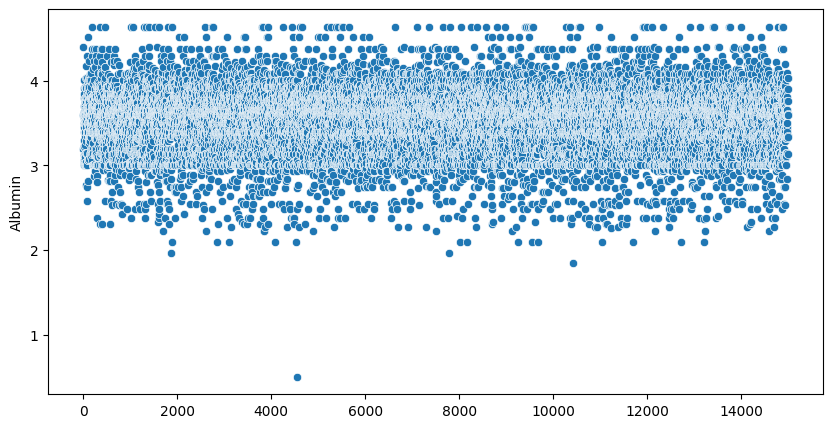

In [431]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Albumin'])
plt.show()   #normal

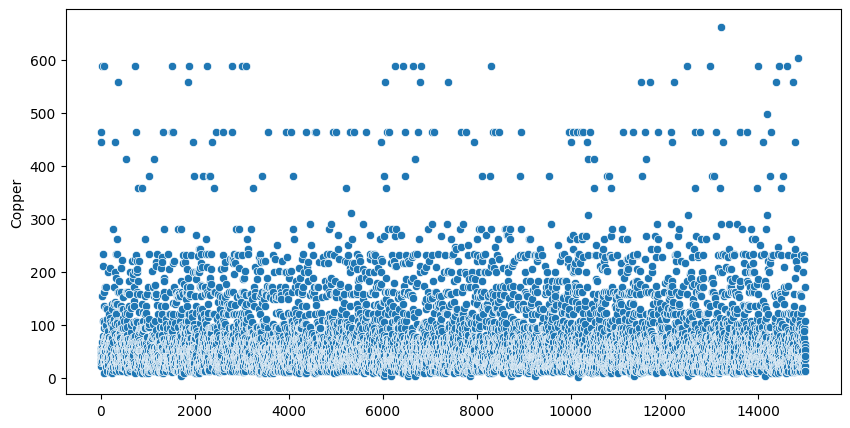

In [432]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Copper'])
plt.show()    #  normal

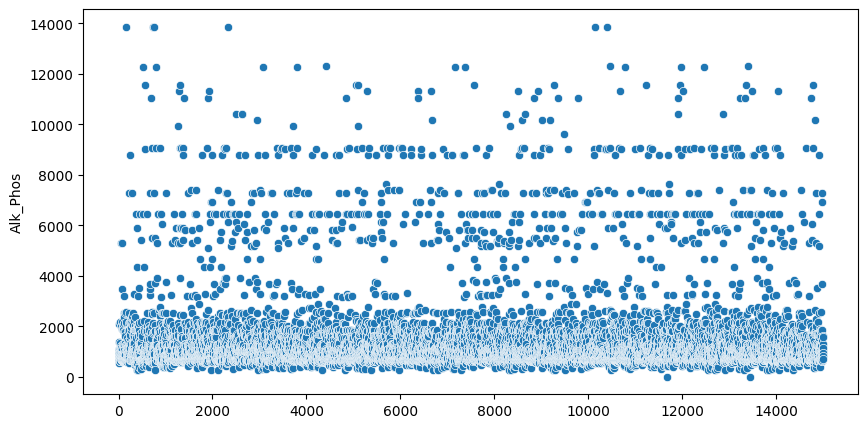

In [433]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Alk_Phos'])
plt.show()    #  good

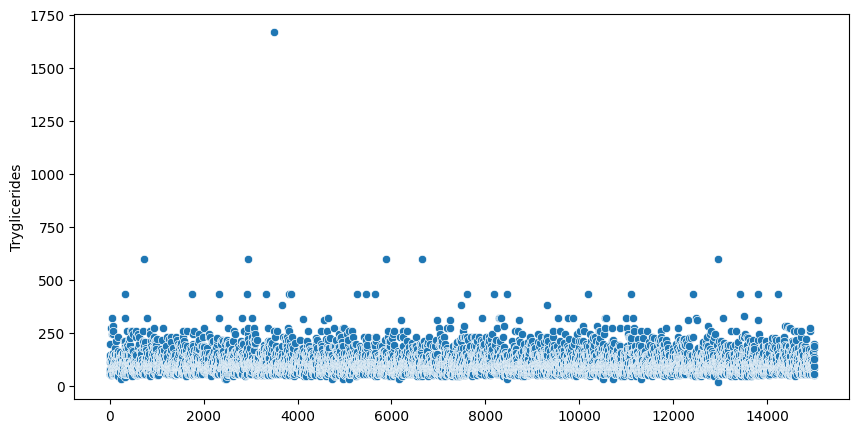

In [434]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Tryglicerides'])
plt.show()
# 500 이상 제거

In [435]:
train_df = train_df[train_df['Tryglicerides']<500]

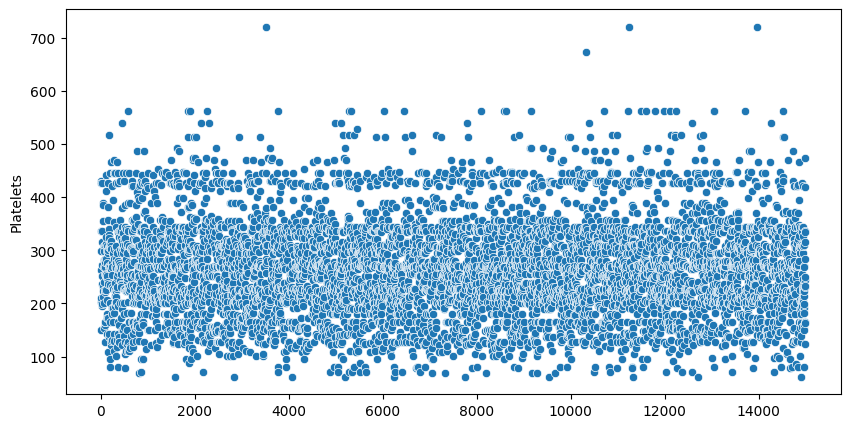

In [436]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Platelets'])
plt.show()
# 600 이상 제거

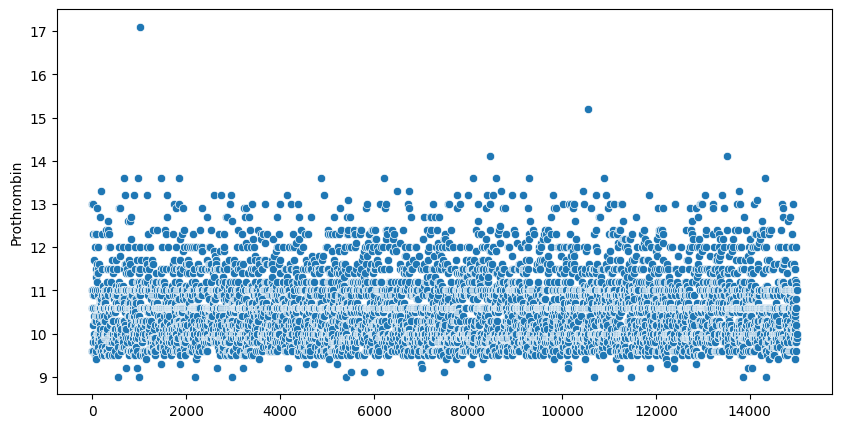

In [437]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Prothrombin'])
plt.show()
# 15 이상 제거

In [438]:
train_df[train_df['Prothrombin']>15]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1010,1010,3388.0,Placebo,55.0,F,N,N,N,N,0.8,212.0,4.01,10.0,558.0,71.3,77.0,311.0,17.1,3.0,C
10545,10545,1000.0,D-penicillamine,55.0,F,Y,Y,N,Y,17.4,1775.0,3.60,231.0,1794.0,130.2,97.0,132.0,15.2,3.0,D


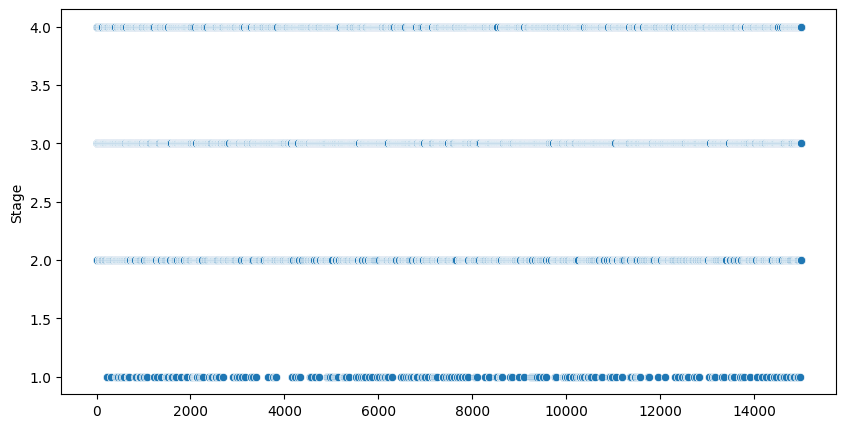

In [439]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['Stage'])
plt.show()    #  Yaxshi

In [440]:
train_df = train_df[train_df['Platelets']<600]

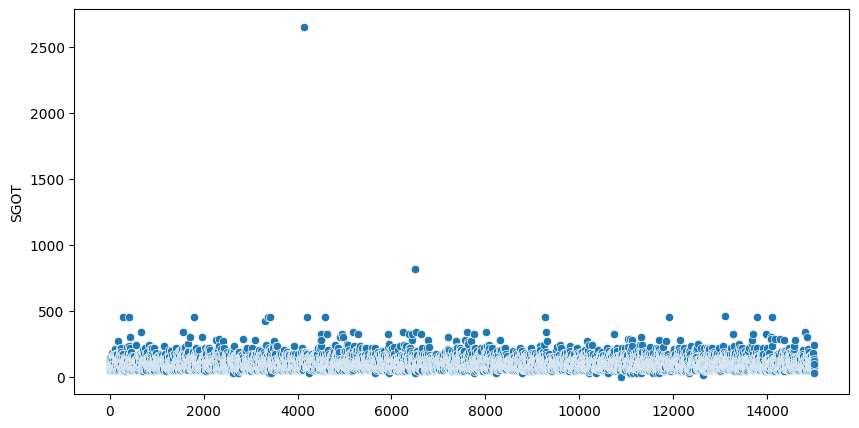

In [441]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df['SGOT'])
plt.show()
# 500 이상 제거

In [442]:
train_df=train_df[train_df['SGOT']<500]

In [443]:
# 3 개  만는 스타투스(status) 값 남
train_df = train_df[train_df["Status"].isin(['C', 'CL', 'D'])]

In [444]:
print(train_df["Status"].value_counts())

Status
C     4357
D     1879
CL     192
Name: count, dtype: int64


In [445]:
# 2. Basic EDA
print("\n--- Train dataset overview ---")
print(train_df.info())
print(train_df.describe())
print(train_df["Status"].value_counts())


--- Train dataset overview ---
<class 'pandas.core.frame.DataFrame'>
Index: 6428 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6428 non-null   int64  
 1   N_Days         6428 non-null   float64
 2   Drug           6428 non-null   object 
 3   Age            6428 non-null   float64
 4   Sex            6428 non-null   object 
 5   Ascites        6428 non-null   object 
 6   Hepatomegaly   6428 non-null   object 
 7   Spiders        6428 non-null   object 
 8   Edema          6428 non-null   object 
 9   Bilirubin      6428 non-null   float64
 10  Cholesterol    6423 non-null   float64
 11  Albumin        6428 non-null   float64
 12  Copper         6383 non-null   float64
 13  Alk_Phos       6428 non-null   float64
 14  SGOT           6428 non-null   float64
 15  Tryglicerides  6428 non-null   float64
 16  Platelets      6428 non-null   float64
 17  Prothrombin    6428 non-

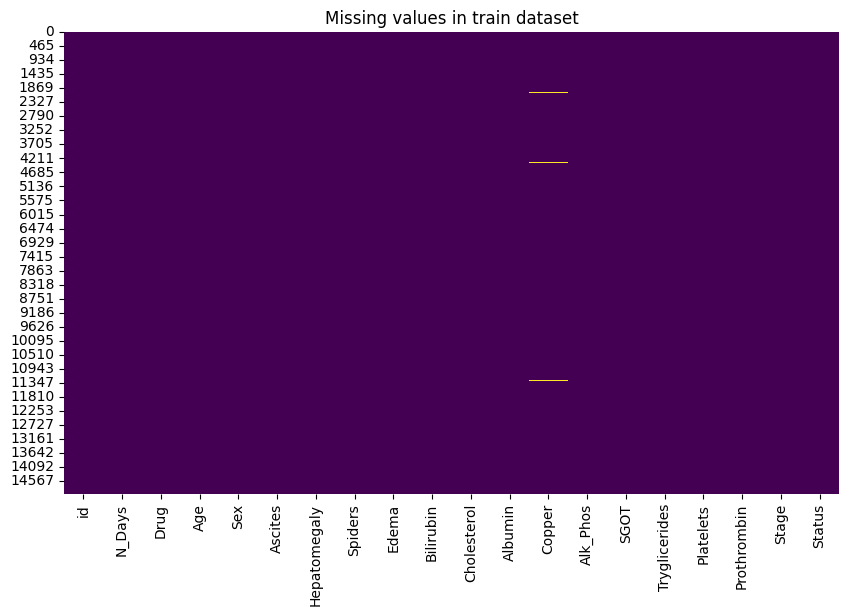

In [446]:
# 3. Null value analysis and visualization
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values in train dataset")
plt.show()

In [447]:
print(f'train_df :{train_df.isna().sum()} /n------------ test_df :{test_df.isna().sum()}')

train_df :id                0
N_Days            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol       5
Albumin           0
Copper           45
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Prothrombin       0
Stage             0
Status            0
dtype: int64 /n------------ test_df :id                  0
N_Days              0
Drug             4398
Age                 0
Sex                 0
Ascites          4391
Hepatomegaly     4402
Spiders          4404
Edema               0
Bilirubin           0
Cholesterol      5647
Albumin             0
Copper           4469
Alk_Phos         4403
SGOT             4406
Tryglicerides    5680
Platelets         382
Prothrombin         9
Stage               0
dtype: int64


NaN qiymatlarni to'ldirish (sonli ustunlar uchun median, kategoriklar uchun mode orqali)

In [448]:
# 4. Fill NaN values using pandas (median for numeric, mode for categorical)
def fill_missing_values(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ["float64", "int64"]:
                median_value = df[col].median()
                df[col] = df[col].fillna(median_value)
                print(f"Filled NaN in numeric column '{col}' with median: {median_value}")
            else:
                mode_value = df[col].mode()[0]
                df[col] = df[col].fillna(mode_value)
                print(f"Filled NaN in categorical column '{col}' with mode: {mode_value}")
    return df
# 훈련/테스트 데이터 결측치 채우기
train_df = fill_missing_values(train_df)
test_df = fill_missing_values(test_df)

Filled NaN in numeric column 'Cholesterol' with median: 280.0
Filled NaN in numeric column 'Copper' with median: 52.0
Filled NaN in categorical column 'Drug' with mode: D-penicillamine
Filled NaN in categorical column 'Ascites' with mode: N
Filled NaN in categorical column 'Hepatomegaly' with mode: N
Filled NaN in categorical column 'Spiders' with mode: N
Filled NaN in numeric column 'Cholesterol' with median: 281.0
Filled NaN in numeric column 'Copper' with median: 52.0
Filled NaN in numeric column 'Alk_Phos' with median: 1062.0
Filled NaN in numeric column 'SGOT' with median: 97.65
Filled NaN in numeric column 'Tryglicerides' with median: 99.0
Filled NaN in numeric column 'Platelets' with median: 251.0
Filled NaN in numeric column 'Prothrombin' with median: 10.6


In [449]:
print(f'train_df :{train_df.isna().sum()} /n------------ test_df :{test_df.isna().sum()}')

train_df :id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64 /n------------ test_df :id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [450]:
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))
    label_encoders[col] = le

In [451]:
target_encoder = LabelEncoder()
train_df['Status'] = target_encoder.fit_transform(train_df['Status'])

In [452]:
# 데이터 전처리: 불필요한 열 제거
X = train_df.drop(columns=['id', 'Status'])
y = train_df['Status']
X_test = test_df.drop(columns=['id'])

In [453]:
# 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [454]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



===== Decision Tree =====
Accuracy: 0.7737
F1 Macro : 0.5700
Log Loss: 8.1561
Klassifikatsia:
              precision    recall  f1-score   support

           C       0.85      0.85      0.85       870
          CL       0.22      0.19      0.20        43
           D       0.65      0.67      0.66       373

    accuracy                           0.77      1286
   macro avg       0.57      0.57      0.57      1286
weighted avg       0.77      0.77      0.77      1286



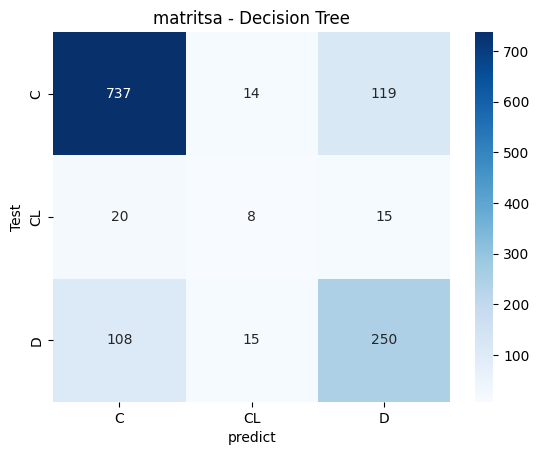



===== Random Forest =====
Accuracy: 0.8600
F1 Macro : 0.5931
Log Loss: 0.4414
Klassifikatsia:
              precision    recall  f1-score   support

           C       0.87      0.95      0.91       870
          CL       0.67      0.05      0.09        43
           D       0.84      0.74      0.78       373

    accuracy                           0.86      1286
   macro avg       0.79      0.58      0.59      1286
weighted avg       0.85      0.86      0.85      1286



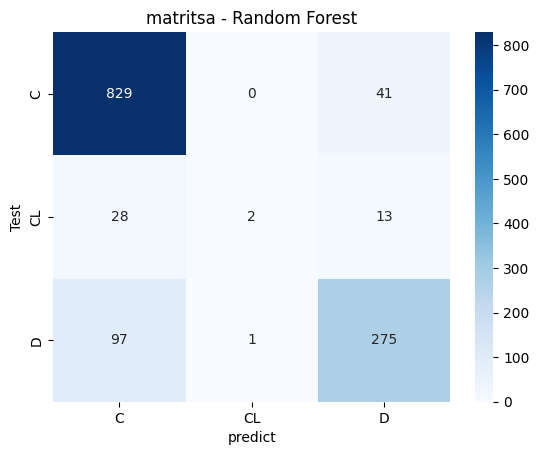

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:41:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)




===== XGBoost =====
Accuracy: 0.8639
F1 Macro : 0.6613
Log Loss: 0.4359
Klassifikatsia:
              precision    recall  f1-score   support

           C       0.88      0.94      0.91       870
          CL       0.57      0.19      0.28        43
           D       0.83      0.76      0.79       373

    accuracy                           0.86      1286
   macro avg       0.76      0.63      0.66      1286
weighted avg       0.86      0.86      0.86      1286



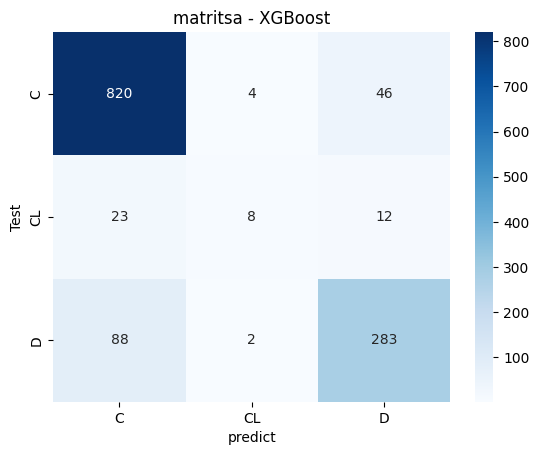

In [455]:
# 모델 정의 및 학습
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

best_model = None
best_f1 = 0
# 모델 훈련 및 평가
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    y_proba = model.predict_proba(X_val_scaled)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')
    logloss = log_loss(y_val, y_proba)
    cm = confusion_matrix(y_val, y_pred)

    print(f"\n\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Macro : {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")
    print("Klassifikatsia:")
    print(classification_report(y_val, y_pred, target_names=target_encoder.classes_))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
    plt.title(f'matritsa - {name}')
    plt.xlabel('predict')
    plt.ylabel('Test')
    plt.show()

    if f1 > best_f1:
        best_model = model
        best_f1 = f1

In [456]:
# best model
probs = best_model.predict_proba(X_test_scaled)

In [457]:
epsilon = 1e-15
probs = np.clip(probs, epsilon, 1 - epsilon)

In [458]:
status_labels = target_encoder.classes_
submission_df = pd.DataFrame(probs, columns=[f"Status_{label}" for label in status_labels])
submission_df.insert(0, "id", test_df['id'])

In [461]:
# 파일 저장
submission_df.to_csv("submission.csv", index=False)
print("\n✅ 'submission.csv' 파일이 가장 좋은 모델을 사용하여 생성되었습니다.")



✅ 'submission.csv' 파일이 가장 좋은 모델을 사용하여 생성되었습니다.
